In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv('daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [33]:
df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [34]:
df.shape

(3650, 2)

In [35]:
df.columns

Index(['Date', 'Temp'], dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [37]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


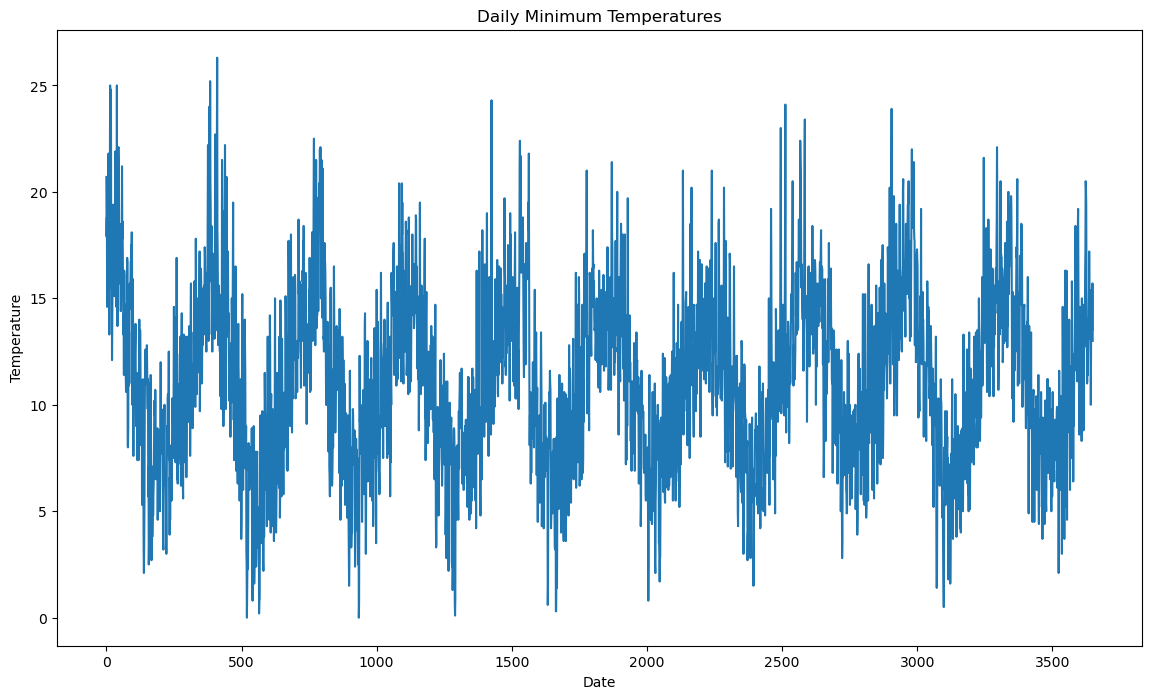

In [38]:
df.plot(title='Daily Minimum Temperatures',figsize=(14,8),legend=None)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [39]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series):
    statistic,p_value,n_lags,critical_values=kpss(series)
    print(f'KPSS Statistic:{statistic:.4f}')
    print(f'P-Value:{p_value:.4f}')
    print(f'Number of Lags:{n_lags}')
    print('Critical Values:')
    for key,value in critical_values.items():
        print(f'{key}{value:.4f}')
    print(f'Result:The series is{"not" if p_value<0.05 else""}stationary')
kpss_test(df['Temp'])


KPSS Statistic:0.0557
P-Value:0.1000
Number of Lags:36
Critical Values:
10%0.3470
5%0.4630
2.5%0.5740
1%0.7390
Result:The series isstationary


C:\Users\Admin\AppData\Local\Temp\ipykernel_2496\3998828064.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic,p_value,n_lags,critical_values=kpss(series)


In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df['Temp'],model='additive',period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

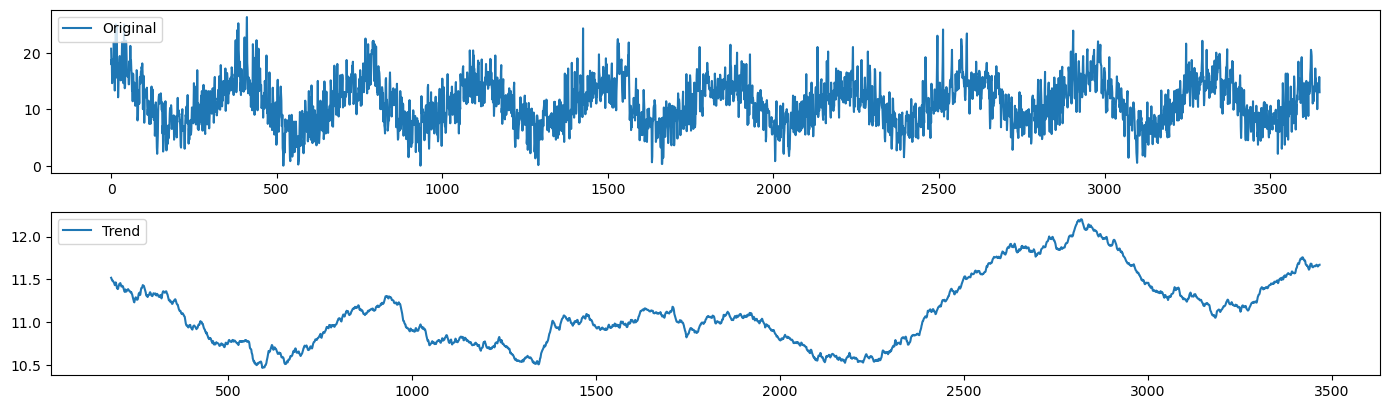

In [41]:
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(df['Temp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

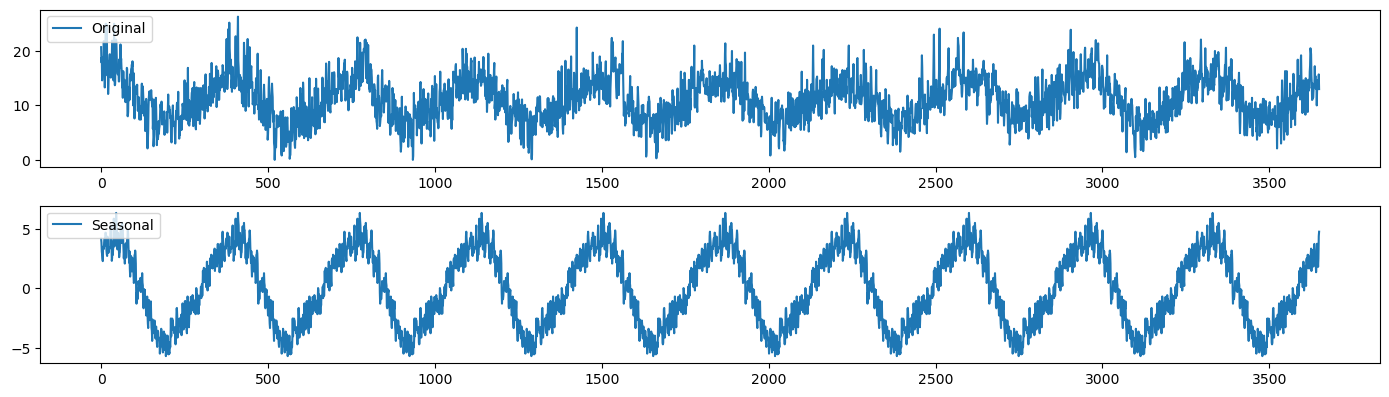

In [42]:
plt.figure(figsize=(14, 8))
plt.subplot(413)
plt.plot(df['Temp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

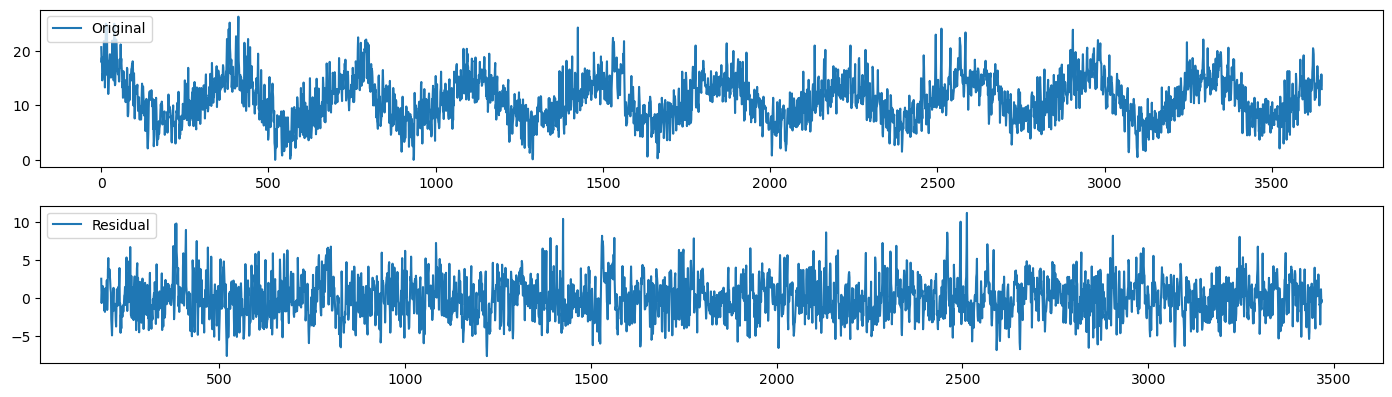

In [43]:
plt.figure(figsize=(14, 8))
plt.subplot(413)
plt.plot(df['Temp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()